<a href="https://colab.research.google.com/github/kiran20v/python/blob/master/MNIST_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# ** MNIST images **
1. Training set, validation set, test set.
2. Hot encoding by to_categorical() for classifying more than 2 




In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random

In [0]:
np.random.seed(0)

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [113]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [0]:
assert(X_train.shape[0] == y_train.shape[0]), "The number images is not equal to number of labels"
assert(X_test.shape[0] == y_test.shape[0]), "The number test images is not equal to number of labels"
#assert(X_train[1:] == (28,28)), "The dimensions of the images are not 28x28"
#assert(X_test[1:] == (28,28)), "The dimensions of the test images are not 28x28"

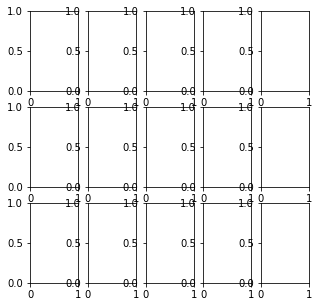

In [115]:
number_of_samples = []
cols = 5
num_classes = 10
fig, axs = plt.subplots(nrows=3, ncols=cols, figsize=(5,5))

1.   **Showing random MNIST images**
2.   **Classifying all images by BAR graph**



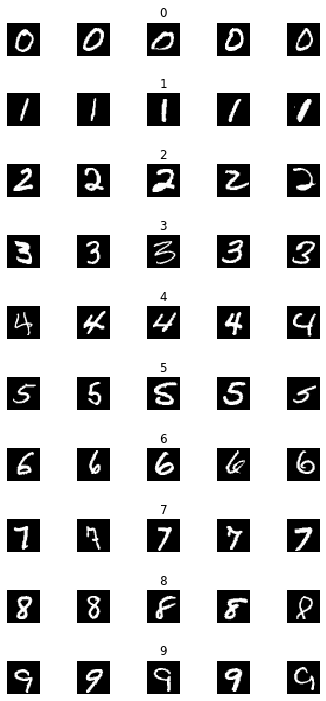

In [116]:
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()
for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
             axs[j][i].set_title(str(j))
             number_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

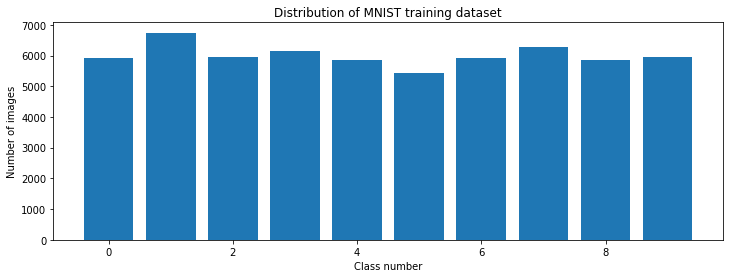

In [117]:
print(number_of_samples)
plt.figure(figsize = (12, 4))
plt.bar(range(0, num_classes), number_of_samples)
plt.title("Distribution of MNIST training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

In [0]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)



1.   Normalizing image pixels to 0 and 1 instead of 0 to 255
2.   with 0 and 1 adjusting weights in neural networks becomes easy



In [0]:
X_train = X_train/255
X_test = X_test/255

In [120]:
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


# **Neural Model**

1.   relu - Non linear
2.   Two Hidden layers




In [0]:
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=num_pixels, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model
    

In [122]:
model = create_model()
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_14 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_15 (Dense)             (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
None


In [123]:
hist = model.fit(X_train, y_train, validation_split=0.1, epochs=30, batch_size=200, verbose=1, shuffle=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/30
54000/54000 [==============================] - 1s 24us/step - loss: 0.5394 - acc: 0.8317 - val_loss: 0.2677 - val_acc: 0.9245
Epoch 2/30
54000/54000 [==============================] - 1s 18us/step - loss: 0.2956 - acc: 0.9132 - val_loss: 0.2217 - val_acc: 0.9373
Epoch 3/30
54000/54000 [==============================] - 1s 18us/step - loss: 0.2647 - acc: 0.9225 - val_loss: 0.2032 - val_acc: 0.9405
Epoch 4/30
54000/54000 [==============================] - 1s 17us/step - loss: 0.2498 - acc: 0.9262 - val_loss: 0.2174 - val_acc: 0.9373
Epoch 5/30
54000/54000 [==============================] - 1s 17us/step - loss: 0.2368 - acc: 0.9302 - val_loss: 0.2186 - val_acc: 0.9355
Epoch 6/30
54000/54000 [==============================] - 1s 17us/step - loss: 0.2305 - acc: 0.9318 - val_loss: 0.2102 - val_acc: 0.9402
Epoch 7/30
54000/54000 [==============================] - 1s 17us/step - loss: 0.2219 - acc: 0.9338 - val_loss: 0.2087 - val_acc:

Text(0.5, 1.0, 'loss')

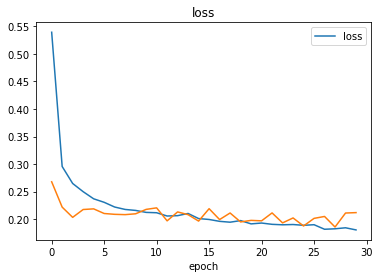

In [124]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.xlabel('epoch')
plt.legend(['loss'])
plt.title('loss')

Text(0.5, 1.0, 'accuracy')

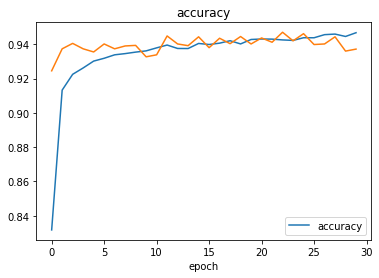

In [125]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.xlabel('epoch')
plt.legend(['accuracy'])
plt.title('accuracy')